In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 1000
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the EMNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f824b784c18>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f8258245fd0>)


Epoch 1: 3.2s to complete
    error(train)=1.93e+00, acc(train)=4.91e-01, error(valid)=1.93e+00, acc(valid)=4.88e-01


Epoch 2: 3.5s to complete
    error(train)=1.64e+00, acc(train)=5.44e-01, error(valid)=1.64e+00, acc(valid)=5.39e-01


Epoch 3: 3.3s to complete
    error(train)=1.54e+00, acc(train)=5.61e-01, error(valid)=1.54e+00, acc(valid)=5.63e-01


Epoch 4: 3.5s to complete
    error(train)=1.46e+00, acc(train)=5.86e-01, error(valid)=1.47e+00, acc(valid)=5.76e-01


Epoch 5: 3.9s to complete
    error(train)=1.45e+00, acc(train)=5.88e-01, error(valid)=1.47e+00, acc(valid)=5.79e-01


Epoch 6: 3.2s to complete
    error(train)=1.42e+00, acc(train)=5.89e-01, error(valid)=1.43e+00, acc(valid)=5.89e-01


Epoch 7: 3.6s to complete
    error(train)=1.38e+00, acc(train)=6.02e-01, error(valid)=1.39e+00, acc(valid)=5.97e-01


Epoch 8: 3.1s to complete
    error(train)=1.36e+00, acc(train)=6.02e-01, error(valid)=1.38e+00, acc(valid)=5.95e-01


Epoch 9: 3.2s to complete
    error(train)=1.36e+00, acc(train)=5.92e-01, error(valid)=1.36e+00, acc(valid)=5.92e-01


Epoch 10: 4.1s to complete
    error(train)=1.34e+00, acc(train)=6.07e-01, error(valid)=1.34e+00, acc(valid)=6.07e-01


Epoch 11: 3.9s to complete
    error(train)=1.33e+00, acc(train)=6.04e-01, error(valid)=1.33e+00, acc(valid)=5.99e-01


Epoch 12: 3.2s to complete
    error(train)=1.39e+00, acc(train)=5.93e-01, error(valid)=1.40e+00, acc(valid)=5.88e-01


Epoch 13: 3.7s to complete
    error(train)=1.36e+00, acc(train)=6.00e-01, error(valid)=1.38e+00, acc(valid)=5.97e-01


Epoch 14: 4.2s to complete
    error(train)=1.25e+00, acc(train)=6.31e-01, error(valid)=1.27e+00, acc(valid)=6.31e-01


Epoch 15: 4.0s to complete
    error(train)=1.33e+00, acc(train)=6.08e-01, error(valid)=1.35e+00, acc(valid)=6.00e-01


Epoch 16: 3.0s to complete
    error(train)=1.27e+00, acc(train)=6.23e-01, error(valid)=1.28e+00, acc(valid)=6.22e-01


Epoch 17: 3.0s to complete
    error(train)=1.29e+00, acc(train)=6.26e-01, error(valid)=1.30e+00, acc(valid)=6.24e-01


Epoch 18: 3.1s to complete
    error(train)=1.27e+00, acc(train)=6.27e-01, error(valid)=1.28e+00, acc(valid)=6.26e-01


Epoch 19: 3.7s to complete
    error(train)=1.32e+00, acc(train)=6.09e-01, error(valid)=1.32e+00, acc(valid)=6.09e-01


Epoch 20: 2.8s to complete
    error(train)=1.26e+00, acc(train)=6.29e-01, error(valid)=1.27e+00, acc(valid)=6.25e-01


Epoch 21: 3.7s to complete
    error(train)=1.26e+00, acc(train)=6.25e-01, error(valid)=1.27e+00, acc(valid)=6.23e-01


Epoch 22: 3.8s to complete
    error(train)=1.23e+00, acc(train)=6.38e-01, error(valid)=1.24e+00, acc(valid)=6.35e-01


Epoch 23: 3.4s to complete
    error(train)=1.28e+00, acc(train)=6.25e-01, error(valid)=1.28e+00, acc(valid)=6.27e-01


Epoch 24: 3.2s to complete
    error(train)=1.37e+00, acc(train)=5.96e-01, error(valid)=1.38e+00, acc(valid)=5.91e-01


Epoch 25: 3.2s to complete
    error(train)=1.32e+00, acc(train)=6.17e-01, error(valid)=1.32e+00, acc(valid)=6.17e-01


Epoch 26: 3.3s to complete
    error(train)=1.25e+00, acc(train)=6.27e-01, error(valid)=1.26e+00, acc(valid)=6.27e-01


Epoch 27: 3.2s to complete
    error(train)=1.26e+00, acc(train)=6.27e-01, error(valid)=1.27e+00, acc(valid)=6.27e-01


Epoch 28: 3.1s to complete
    error(train)=1.25e+00, acc(train)=6.35e-01, error(valid)=1.27e+00, acc(valid)=6.30e-01


Epoch 29: 3.2s to complete
    error(train)=1.31e+00, acc(train)=6.20e-01, error(valid)=1.33e+00, acc(valid)=6.16e-01


Epoch 30: 3.2s to complete
    error(train)=1.29e+00, acc(train)=6.29e-01, error(valid)=1.31e+00, acc(valid)=6.22e-01


Epoch 31: 3.4s to complete
    error(train)=1.34e+00, acc(train)=6.05e-01, error(valid)=1.34e+00, acc(valid)=6.02e-01


Epoch 32: 4.3s to complete
    error(train)=1.21e+00, acc(train)=6.42e-01, error(valid)=1.22e+00, acc(valid)=6.38e-01


Epoch 33: 3.9s to complete
    error(train)=1.28e+00, acc(train)=6.17e-01, error(valid)=1.28e+00, acc(valid)=6.20e-01


Epoch 34: 3.6s to complete
    error(train)=1.18e+00, acc(train)=6.49e-01, error(valid)=1.19e+00, acc(valid)=6.45e-01


Epoch 35: 3.2s to complete
    error(train)=1.22e+00, acc(train)=6.38e-01, error(valid)=1.23e+00, acc(valid)=6.33e-01


Epoch 36: 3.5s to complete
    error(train)=1.16e+00, acc(train)=6.56e-01, error(valid)=1.17e+00, acc(valid)=6.53e-01


Epoch 37: 3.2s to complete
    error(train)=1.22e+00, acc(train)=6.35e-01, error(valid)=1.24e+00, acc(valid)=6.32e-01


Epoch 38: 3.5s to complete
    error(train)=1.32e+00, acc(train)=6.09e-01, error(valid)=1.34e+00, acc(valid)=6.06e-01


Epoch 39: 3.4s to complete
    error(train)=1.24e+00, acc(train)=6.35e-01, error(valid)=1.24e+00, acc(valid)=6.36e-01


Epoch 40: 3.4s to complete
    error(train)=1.29e+00, acc(train)=6.17e-01, error(valid)=1.29e+00, acc(valid)=6.13e-01


Epoch 41: 3.8s to complete
    error(train)=1.25e+00, acc(train)=6.28e-01, error(valid)=1.25e+00, acc(valid)=6.28e-01


Epoch 42: 3.4s to complete
    error(train)=1.26e+00, acc(train)=6.29e-01, error(valid)=1.27e+00, acc(valid)=6.23e-01


Epoch 43: 3.6s to complete
    error(train)=1.24e+00, acc(train)=6.38e-01, error(valid)=1.24e+00, acc(valid)=6.41e-01


Epoch 44: 3.6s to complete
    error(train)=1.17e+00, acc(train)=6.48e-01, error(valid)=1.19e+00, acc(valid)=6.41e-01


Epoch 45: 3.5s to complete
    error(train)=1.21e+00, acc(train)=6.43e-01, error(valid)=1.22e+00, acc(valid)=6.41e-01


Epoch 46: 3.4s to complete
    error(train)=1.20e+00, acc(train)=6.44e-01, error(valid)=1.22e+00, acc(valid)=6.39e-01


Epoch 47: 4.7s to complete
    error(train)=1.19e+00, acc(train)=6.48e-01, error(valid)=1.20e+00, acc(valid)=6.43e-01


Epoch 48: 3.6s to complete
    error(train)=1.22e+00, acc(train)=6.41e-01, error(valid)=1.24e+00, acc(valid)=6.33e-01


Epoch 49: 3.7s to complete
    error(train)=1.31e+00, acc(train)=6.26e-01, error(valid)=1.32e+00, acc(valid)=6.24e-01


Epoch 50: 4.4s to complete
    error(train)=1.25e+00, acc(train)=6.38e-01, error(valid)=1.26e+00, acc(valid)=6.34e-01


Epoch 51: 3.2s to complete
    error(train)=1.21e+00, acc(train)=6.52e-01, error(valid)=1.22e+00, acc(valid)=6.52e-01


Epoch 52: 3.1s to complete
    error(train)=1.28e+00, acc(train)=6.28e-01, error(valid)=1.31e+00, acc(valid)=6.19e-01


Epoch 53: 3.1s to complete
    error(train)=1.22e+00, acc(train)=6.44e-01, error(valid)=1.24e+00, acc(valid)=6.35e-01


Epoch 54: 3.0s to complete
    error(train)=1.20e+00, acc(train)=6.49e-01, error(valid)=1.22e+00, acc(valid)=6.47e-01


Epoch 55: 3.1s to complete
    error(train)=1.29e+00, acc(train)=6.31e-01, error(valid)=1.30e+00, acc(valid)=6.24e-01


Epoch 56: 3.0s to complete
    error(train)=1.27e+00, acc(train)=6.35e-01, error(valid)=1.28e+00, acc(valid)=6.30e-01


Epoch 57: 3.1s to complete
    error(train)=1.27e+00, acc(train)=6.40e-01, error(valid)=1.27e+00, acc(valid)=6.38e-01


Epoch 58: 2.8s to complete
    error(train)=1.22e+00, acc(train)=6.45e-01, error(valid)=1.22e+00, acc(valid)=6.47e-01


Epoch 59: 3.1s to complete
    error(train)=1.26e+00, acc(train)=6.35e-01, error(valid)=1.27e+00, acc(valid)=6.30e-01


Epoch 60: 2.9s to complete
    error(train)=1.24e+00, acc(train)=6.33e-01, error(valid)=1.24e+00, acc(valid)=6.32e-01


Epoch 61: 3.0s to complete
    error(train)=1.24e+00, acc(train)=6.49e-01, error(valid)=1.25e+00, acc(valid)=6.45e-01


Epoch 62: 3.2s to complete
    error(train)=1.21e+00, acc(train)=6.48e-01, error(valid)=1.22e+00, acc(valid)=6.41e-01


Epoch 63: 3.4s to complete
    error(train)=1.24e+00, acc(train)=6.36e-01, error(valid)=1.24e+00, acc(valid)=6.42e-01


Epoch 64: 3.3s to complete
    error(train)=1.24e+00, acc(train)=6.43e-01, error(valid)=1.26e+00, acc(valid)=6.41e-01


Epoch 65: 3.3s to complete
    error(train)=1.15e+00, acc(train)=6.49e-01, error(valid)=1.18e+00, acc(valid)=6.48e-01


Epoch 66: 3.4s to complete
    error(train)=1.23e+00, acc(train)=6.39e-01, error(valid)=1.24e+00, acc(valid)=6.35e-01


Epoch 67: 3.5s to complete
    error(train)=1.17e+00, acc(train)=6.49e-01, error(valid)=1.19e+00, acc(valid)=6.45e-01


Epoch 68: 3.4s to complete
    error(train)=1.19e+00, acc(train)=6.44e-01, error(valid)=1.21e+00, acc(valid)=6.43e-01


Epoch 69: 3.7s to complete
    error(train)=1.31e+00, acc(train)=6.17e-01, error(valid)=1.32e+00, acc(valid)=6.09e-01


Epoch 70: 3.5s to complete
    error(train)=1.23e+00, acc(train)=6.45e-01, error(valid)=1.24e+00, acc(valid)=6.37e-01


Epoch 71: 3.3s to complete
    error(train)=1.21e+00, acc(train)=6.53e-01, error(valid)=1.22e+00, acc(valid)=6.53e-01


Epoch 72: 3.9s to complete
    error(train)=1.21e+00, acc(train)=6.44e-01, error(valid)=1.22e+00, acc(valid)=6.38e-01


Epoch 73: 3.6s to complete
    error(train)=1.21e+00, acc(train)=6.50e-01, error(valid)=1.23e+00, acc(valid)=6.44e-01


Epoch 74: 3.7s to complete
    error(train)=1.14e+00, acc(train)=6.61e-01, error(valid)=1.16e+00, acc(valid)=6.57e-01


Epoch 75: 4.0s to complete
    error(train)=1.31e+00, acc(train)=6.24e-01, error(valid)=1.32e+00, acc(valid)=6.17e-01


Epoch 76: 3.3s to complete
    error(train)=1.22e+00, acc(train)=6.46e-01, error(valid)=1.23e+00, acc(valid)=6.40e-01


Epoch 77: 3.2s to complete
    error(train)=1.18e+00, acc(train)=6.58e-01, error(valid)=1.19e+00, acc(valid)=6.57e-01


Epoch 78: 2.9s to complete
    error(train)=1.13e+00, acc(train)=6.67e-01, error(valid)=1.15e+00, acc(valid)=6.62e-01


Epoch 79: 3.3s to complete
    error(train)=1.17e+00, acc(train)=6.56e-01, error(valid)=1.18e+00, acc(valid)=6.54e-01


Epoch 80: 3.4s to complete
    error(train)=1.19e+00, acc(train)=6.49e-01, error(valid)=1.21e+00, acc(valid)=6.47e-01


Epoch 81: 4.5s to complete
    error(train)=1.13e+00, acc(train)=6.66e-01, error(valid)=1.15e+00, acc(valid)=6.62e-01


Epoch 82: 5.0s to complete
    error(train)=1.19e+00, acc(train)=6.53e-01, error(valid)=1.20e+00, acc(valid)=6.45e-01


Epoch 83: 4.2s to complete
    error(train)=1.20e+00, acc(train)=6.56e-01, error(valid)=1.21e+00, acc(valid)=6.52e-01


Epoch 84: 4.6s to complete
    error(train)=1.20e+00, acc(train)=6.51e-01, error(valid)=1.21e+00, acc(valid)=6.49e-01


Epoch 85: 3.3s to complete
    error(train)=1.19e+00, acc(train)=6.52e-01, error(valid)=1.20e+00, acc(valid)=6.47e-01


Epoch 86: 3.5s to complete
    error(train)=1.21e+00, acc(train)=6.53e-01, error(valid)=1.21e+00, acc(valid)=6.52e-01


Epoch 87: 3.2s to complete
    error(train)=1.23e+00, acc(train)=6.42e-01, error(valid)=1.24e+00, acc(valid)=6.44e-01


Epoch 88: 3.2s to complete
    error(train)=1.14e+00, acc(train)=6.62e-01, error(valid)=1.16e+00, acc(valid)=6.53e-01


Epoch 89: 3.5s to complete
    error(train)=1.09e+00, acc(train)=6.73e-01, error(valid)=1.11e+00, acc(valid)=6.68e-01


Epoch 90: 3.4s to complete
    error(train)=1.16e+00, acc(train)=6.63e-01, error(valid)=1.19e+00, acc(valid)=6.58e-01


Epoch 91: 3.1s to complete
    error(train)=1.16e+00, acc(train)=6.62e-01, error(valid)=1.18e+00, acc(valid)=6.58e-01


Epoch 92: 3.6s to complete
    error(train)=1.17e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.59e-01


Epoch 93: 3.8s to complete
    error(train)=1.20e+00, acc(train)=6.38e-01, error(valid)=1.21e+00, acc(valid)=6.31e-01


Epoch 94: 3.4s to complete
    error(train)=1.14e+00, acc(train)=6.54e-01, error(valid)=1.16e+00, acc(valid)=6.47e-01


Epoch 95: 3.8s to complete
    error(train)=1.22e+00, acc(train)=6.55e-01, error(valid)=1.23e+00, acc(valid)=6.54e-01


Epoch 96: 4.3s to complete
    error(train)=1.18e+00, acc(train)=6.53e-01, error(valid)=1.20e+00, acc(valid)=6.49e-01


Epoch 97: 3.5s to complete
    error(train)=1.17e+00, acc(train)=6.59e-01, error(valid)=1.18e+00, acc(valid)=6.55e-01


Epoch 98: 2.9s to complete
    error(train)=1.17e+00, acc(train)=6.60e-01, error(valid)=1.19e+00, acc(valid)=6.58e-01


Epoch 99: 2.7s to complete
    error(train)=1.17e+00, acc(train)=6.56e-01, error(valid)=1.18e+00, acc(valid)=6.49e-01


Epoch 100: 3.0s to complete
    error(train)=1.19e+00, acc(train)=6.44e-01, error(valid)=1.21e+00, acc(valid)=6.39e-01


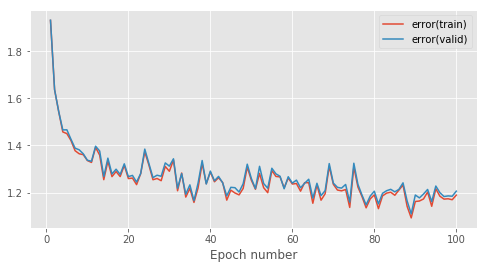

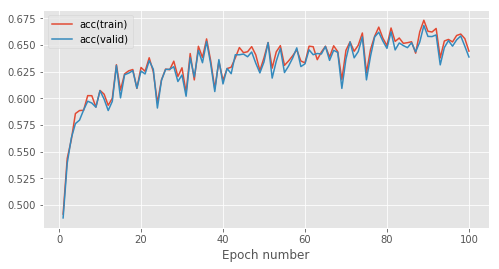

In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError,SumOfSquaredDiffsError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty
#setup hyperparameters
learning_rate = 0.005
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_penalty=L2Penalty(0.01)
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty),
    
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule

learning_rule =  AdamLearningRule()
#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)